## Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation, PillowWriter

In [4]:
data = pd.read_csv("IceCreamData.csv")
data = data.dropna()
train_input = np.array(data['Temperature'][0:400].to_numpy().reshape(-1,1))
train_output = np.array(data['Revenue'][0:400].to_numpy().reshape(-1,1))
test_input = np.array(data['Temperature'][400:500].to_numpy().reshape(-1,1))
test_output = np.array(data['Revenue'][400:500].to_numpy().reshape(-1,1))

In [5]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['w']
        c = self.parameters['b']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dw = 2 * np.mean(np.multiply(train_input, df))
        db = 2 * np.mean(df)
        derivatives['dw'] = dw
        derivatives['db'] = db
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['w'] = self.parameters['w'] - learning_rate * derivatives['dw']
        self.parameters['b'] = self.parameters['b'] - learning_rate * derivatives['db']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['w'] = np.random.uniform(0, 1) * -1
        self.parameters['b'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['w'] * x_vals + self.parameters['b'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['w'] * x_vals + self.parameters['b'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss




Iteration = 1, Loss = 295665.57598038384
Iteration = 1, Loss = 3238.636585483572
Iteration = 1, Loss = 838.8724637860432
Iteration = 1, Loss = 819.0657828166896
Iteration = 2, Loss = 818.7890403705281
Iteration = 3, Loss = 818.6726140247036
Iteration = 4, Loss = 818.5575570071632
Iteration = 5, Loss = 818.4425649784378
Iteration = 6, Loss = 818.3276272098202
Iteration = 7, Loss = 818.2127435879624
Iteration = 8, Loss = 818.0979140866341
Iteration = 9, Loss = 817.9831386803357
Iteration = 10, Loss = 817.8684173435815
Iteration = 11, Loss = 817.7537500509007
Iteration = 12, Loss = 817.6391367768343
Iteration = 13, Loss = 817.5245774959337
Iteration = 14, Loss = 817.4100721827639
Iteration = 15, Loss = 817.2956208118999
Iteration = 16, Loss = 817.1812233579321
Iteration = 17, Loss = 817.0668797954603
Iteration = 18, Loss = 816.9525900990966
Iteration = 19, Loss = 816.8383542434636
Iteration = 20, Loss = 816.7241722031996
Iteration = 21, Loss = 816.6100439529511
Iteration = 22, Loss = 816.

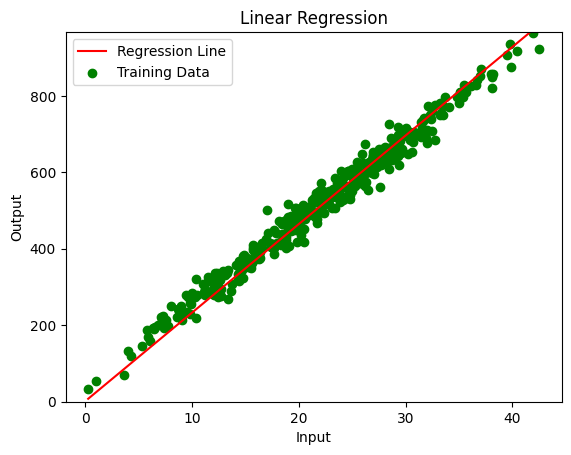

In [6]:
model = LinearRegression()
params, losses = model.train(train_input, train_output, learning_rate=0.001, iters=100)

In [7]:
print("Final Parameters:")
print(f"Weight (w): {params['w']}")
print(f"Bias (b): {params['b']}")
print(f"Final MSE Loss: {losses[-1]}")

Final Parameters:
Weight (w): 23.147997940474003
Bias (b): 1.5646445218492966
Final MSE Loss: 807.7617463488255


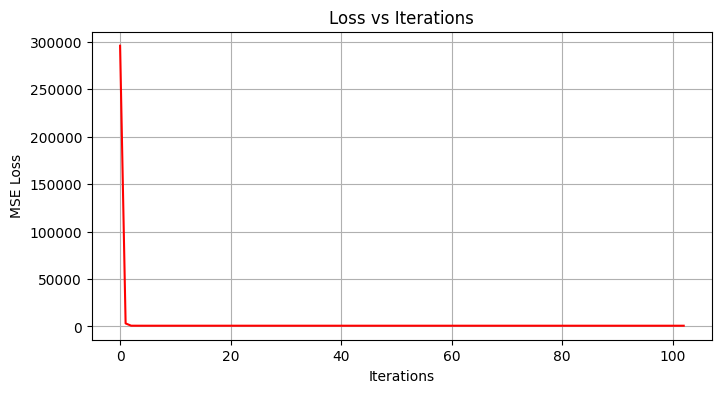

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(losses)), losses, color='red')
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()


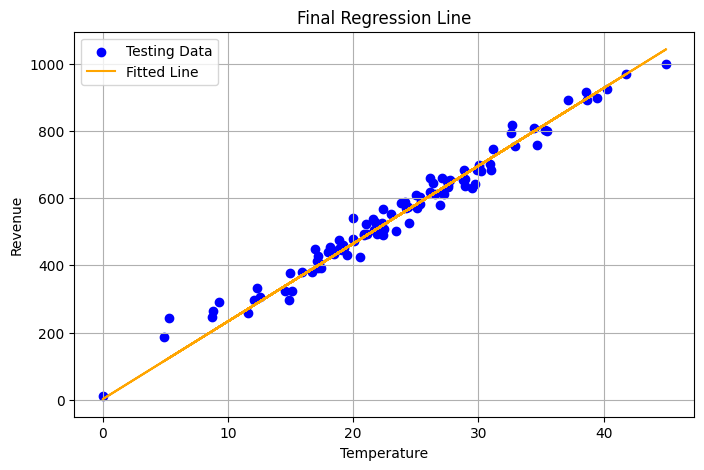

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(test_input, test_output, color='blue', label='Testing Data')
plt.plot(test_input, model.parameters['w'] * test_input + model.parameters['b'],
         color='orange', label='Fitted Line')
plt.title('Final Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression Using epoch

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation, PillowWriter

In [11]:
data = pd.read_csv("IceCreamData.csv")
data = data.dropna()
train_input = np.array(data['Temperature'][0:400].to_numpy().reshape(-1,1))
train_output = np.array(data['Revenue'][0:400].to_numpy().reshape(-1,1))
test_input = np.array(data['Temperature'][400:500].to_numpy().reshape(-1,1))
test_output = np.array(data['Revenue'][400:500].to_numpy().reshape(-1,1))

In [12]:
# This Linear Regression have Batch gradient Descent Process.

class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        w = self.parameters['w']
        b = self.parameters['b']
        predictions = np.multiply(w, train_input) + b
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def back_propagation(self, predictions, train_input, train_output):
        df = (predictions - train_output)
        dw = 2 * np.mean(np.multiply(train_input, df))
        db = 2 * np.mean(df)
        return {'dw': dw, 'db': db}

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['w'] -= learning_rate * derivatives['dw']
        self.parameters['b'] -= learning_rate * derivatives['db']

    def train(self, train_input, train_output, learning_rate=0.01, epochs=1000):
        self.parameters['w'] = 0.0
        self.parameters['b'] = 0.0

        losses = []
        predictions_over_time = []

        for epoch in range(epochs):
            preds = self.forward_propagation(train_input)
            cost = self.cost_function(preds, train_output)
            losses.append(cost)

            derivatives = self.back_propagation(preds, train_input, train_output)
            self.update_parameters(derivatives, learning_rate)

            # Save predictions for animation every 10 epochs
            if (epoch + 1) % 10 == 0:
                predictions_over_time.append(preds.copy())

            # Display the progress
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Cost: {cost:.4f}, w: {self.parameters['w']:.4f}, b: {self.parameters['b']:.4f}")

        return losses, predictions_over_time

    def predict(self, input_data):
        return self.forward_propagation(input_data)




In [13]:
model = LinearRegression()
learning_rate = 0.001
epochs = 50

losses, predictions_over_time = model.train(train_input, train_output, learning_rate, epochs)

print("Trained Parameters:", model.parameters)

Trained Parameters: {'w': np.float64(23.152170419043937), 'b': np.float64(1.461005386478103)}


In [14]:
train_predictions = model.predict(train_input)
test_predictions = model.predict(test_input)

train_mse = np.mean((train_output - train_predictions) ** 2)
test_mse = np.mean((test_output - test_predictions) ** 2)

print(f"\nTrain MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")



Train MSE: 808.7403
Test MSE: 980.3907


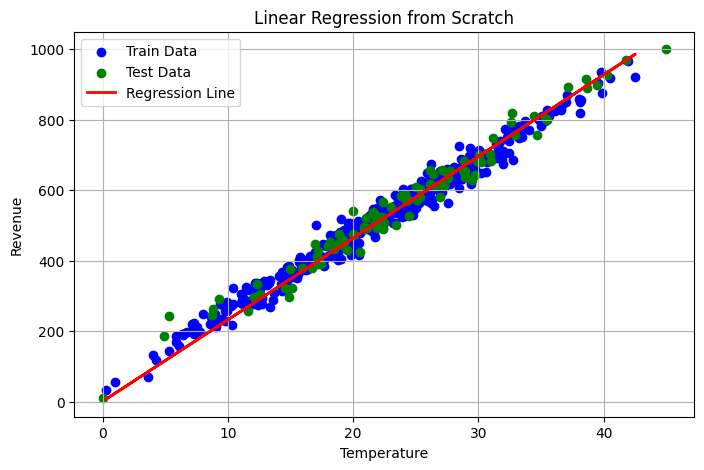

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(train_input, train_output, color='blue', label='Train Data')
plt.scatter(test_input, test_output, color='green', label='Test Data')
plt.plot(train_input, train_predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Linear Regression from Scratch')
plt.legend()
plt.grid(True)
plt.show()

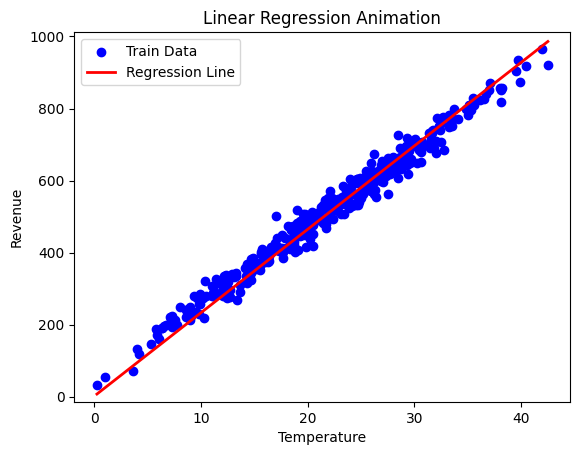

In [16]:
fig, ax = plt.subplots()
ax.scatter(train_input, train_output, color='blue', label='Train Data')
line, = ax.plot([], [], color='red', linewidth=2, label='Regression Line')
ax.set_xlabel('Temperature')
ax.set_ylabel('Revenue')
ax.set_title('Linear Regression Animation')
ax.legend()

def animate(i):
    sorted_idx = np.argsort(train_input.flatten())
    x_sorted = train_input.flatten()[sorted_idx]
    y_sorted = predictions_over_time[i].flatten()[sorted_idx]
    line.set_data(x_sorted, y_sorted)
    return line,

ani = FuncAnimation(fig, animate, frames=len(predictions_over_time), interval=50, blit=True)
plt.show()

In [17]:
writer = PillowWriter(fps=30)
ani.save("LinearRegression.gif", writer=writer)
print("Animation saved as LinearRegression.gif")

Animation saved as LinearRegression.gif


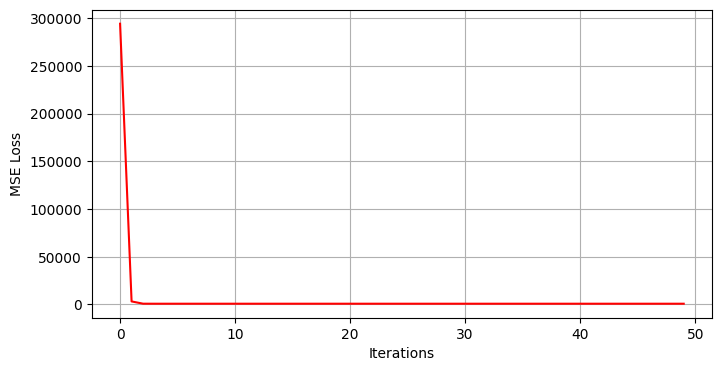

In [18]:
# -------------------------------
plt.figure(figsize=(8, 4))
plt.plot(range(len(losses)), losses, color='red')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()